# Домашнее задание "Элементарные методы анализа временных рядов" 
Взять из прошлого домашнего задания ряд (в двух вариантах - стационарный и нет) и приблизить оба эти варианта моделями из класса MA. Оценить качество и прислать соображения почему была выбрана та или иная модель.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
dowjones_closing = pd.read_csv("D:/Netology/Python/Data_Science/Time_Series/1_Знакомство с временными рядами/Series/weekly-closings-of-the-dowjones-.csv")
series = dowjones_closing["Close"]

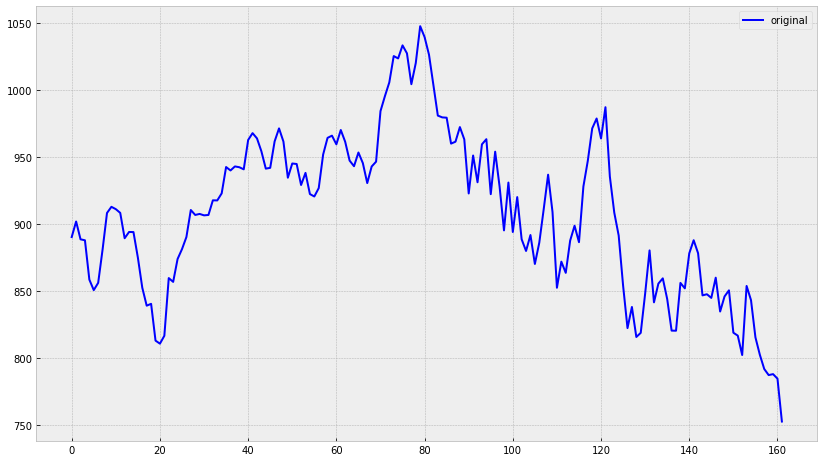

In [3]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series, color='blue',label='original')
    plt.legend()

In [4]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

In [5]:
def exponential_moving_average(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(result)

MSE с скользящим средним: 98.1
MSE с экспоненциальным сглаживанием: 37.7


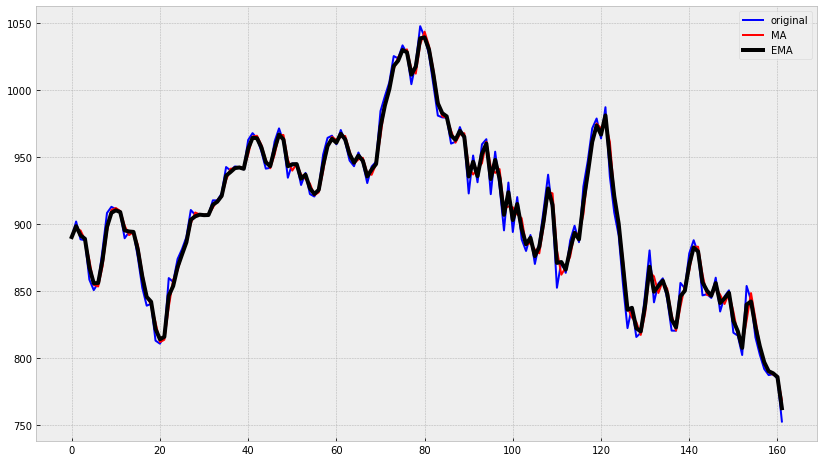

In [6]:
window = 2
ma = moving_average(series, window)
ema = exponential_moving_average(series, 0.7)

with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series, color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(ema, color='black', linewidth='4', label='EMA')
    plt.legend()

mse_ma = mean_squared_error(series[window-1:], ma[window-1:])
mse_ema = mean_squared_error(series, ema)
print(f'MSE с скользящим средним: {(mse_ma):.3}')
print(f'MSE с экспоненциальным сглаживанием: {(mse_ema):.3}')

### Случай стационарного ряда

In [7]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        plt.tight_layout()
    return

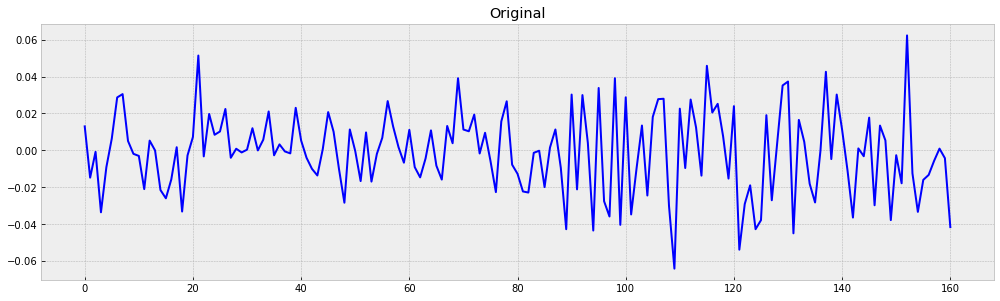

In [8]:
series = boxcox(series, 0)
series = series[1:] - series[:-1]
tsplot(series)

MSE с скользящим средним: 0.000253
MSE с экспоненциальным сглаживанием: 6.89e-05


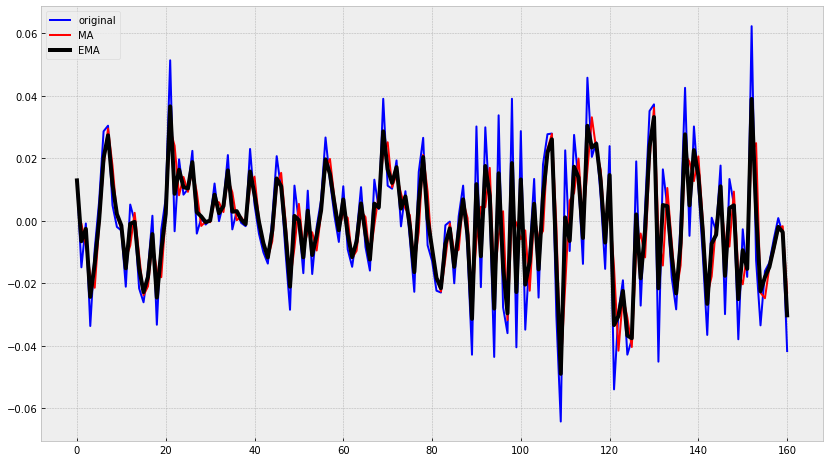

In [9]:
window = 2
ma = moving_average(series, window)
ema = exponential_moving_average(series, 0.7)

with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series, color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(ema, color='black', linewidth='4', label='EMA')
    plt.legend()

mse_ma = mean_squared_error(series[window-1:], ma[window-1:])
mse_ema = mean_squared_error(series, ema)
print(f'MSE с скользящим средним: {(mse_ma):.3}')
print(f'MSE с экспоненциальным сглаживанием: {(mse_ema):.3}')